In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
cd "/content/gdrive/My Drive/Bird_ID_project/nabirds/"

/content/gdrive/My Drive/Bird_ID_project/nabirds


In [ ]:
DATADIR = "../nabirds/"
IMAGEDIR = DATADIR + "images2/"

In [ ]:
# create the list for bird classes
idx2label = {}
with open(DATADIR+"classes.txt") as f:
    lines = f.readlines()
    
for l in lines:
    idx, name = l.split(' ', 1)
    idx2label[int(idx)] = name.split('\n')[0]

In [ ]:
dirlist = os.listdir(IMAGEDIR)

In [ ]:
df = pd.DataFrame({'id':['1'], # ID
                   'label': ['label'], # bird class
                   'nimage' :[1], # number of images per bird category
                   'path' : ['path'] # relative path to the directory
                  })

for i, d in enumerate(dirlist):
    path = os.path.join(IMAGEDIR, d)
    nimage = len(os.listdir(path))
    df.loc[i] = [d, idx2label[int(d)], nimage, path]

In [ ]:
df.head()

,id,label,nimage,path
0,0975,Dark-eyed Junco (White-winged),13,../nabirds/images2/0975
1,1008,Orchard Oriole (Female/Juvenile),55,../nabirds/images2/1008
2,0361,Rough-legged Hawk (Dark morph),50,../nabirds/images2/0361
3,0942,Plumbeous Vireo,75,../nabirds/images2/0942
4,0478,American White Pelican,64,../nabirds/images2/0478


In [ ]:
# sort it according to the number of images
ind = df['nimage'].argsort()   #按升序排列
df.loc[ind][:5]


,id,label,nimage,path
0,0975,Dark-eyed Junco (White-winged),13,../nabirds/images2/0975
439,0664,Purple Gallinule (Immature),21,../nabirds/images2/0664
91,0341,Red-throated Loon (Breeding),23,../nabirds/images2/0341
514,0755,Snow Bunting (Breeding adult),24,../nabirds/images2/0755
275,1006,Fox Sparrow (Thick-billed/Slate-colored),25,../nabirds/images2/1006


In [ ]:
df.loc[df['id']=='0753']

,id,label,nimage,path
310,0753,American Robin (Adult),119,../nabirds/images/0753


In [ ]:
ids = [753, 772, 852, 822]
df.loc[df['id'].isin(['{}'.format(i).zfill(4) for i in ids])]

,id,label,nimage,path
233,0822,Bushtit,120,../nabirds/images/0822
310,0753,American Robin (Adult),119,../nabirds/images/0753
327,0852,Northern Mockingbird,120,../nabirds/images/0852
329,0772,Northern Cardinal (Adult Male),120,../nabirds/images/0772


In [ ]:
import os, shutil
from pathlib import Path

def createDir(dirpath):
    if os.path.isdir(dirpath):
        print("# Directory exists: {}".format(dirpath))
    else:
        os.mkdir(dirpath)
        print("# created {}".format(dirpath))

In [ ]:
# create (cats, dogs) for (train, validation, test) dir
categories = ['{}'.format(i).zfill(4) for i in ids]      #['0753', '0772', '0852', '0822']
dirtypes = ['train', 'validation', 'test']               #['train', 'validation', 'test']

# The directory where we will
# store our smaller dataset
base_dir = '/content/gdrive/My Drive/Bird_ID_project/nabirds/data/'
createDir(base_dir)

dirnames = {}
for j, d in enumerate(dirtypes):
    dirname = d
    dirpath = os.path.join(base_dir, d)
    dirnames[dirname] = dirpath               #test': '/content/gdrive/My Drive/Bird_ID_project/nabirds/data/test'
    
    for c in categories:
        dirname = d+"_"+c
        subdirpath = os.path.join(dirpath, c)
        dirnames[dirname] = subdirpath        #test_0753': '/content/gdrive/My Drive/Bird_ID_project/nabirds/data/test/0753

print("# Creating directories")               #產生目錄
for k, v in dirnames.items():
    print("{} : {}".format(k,v))
    createDir(v)

# Directory exists: /content/gdrive/My Drive/Bird_ID_project/nabirds/data/
# Creating directories
train : /content/gdrive/My Drive/Bird_ID_project/nabirds/data/train
# Directory exists: /content/gdrive/My Drive/Bird_ID_project/nabirds/data/train
train_0753 : /content/gdrive/My Drive/Bird_ID_project/nabirds/data/train/0753
# Directory exists: /content/gdrive/My Drive/Bird_ID_project/nabirds/data/train/0753
train_0772 : /content/gdrive/My Drive/Bird_ID_project/nabirds/data/train/0772
# Directory exists: /content/gdrive/My Drive/Bird_ID_project/nabirds/data/train/0772
train_0852 : /content/gdrive/My Drive/Bird_ID_project/nabirds/data/train/0852
# Directory exists: /content/gdrive/My Drive/Bird_ID_project/nabirds/data/train/0852
train_0822 : /content/gdrive/My Drive/Bird_ID_project/nabirds/data/train/0822
# Directory exists: /content/gdrive/My Drive/Bird_ID_project/nabirds/data/train/0822
validation : /content/gdrive/My Drive/Bird_ID_project/nabirds/data/validation
# Directory exists: /con

copy images from their original folder to the target folder
For each category (folder):
1.  obtain a list of images (filenames)
2. shuttle the list
3. pick the train/validate/test set according to the ratio
4. copy the images to the target location

將圖像從其原始文件夾複製到目標文件夾對於每個類別（文件夾）：
1. 獲取圖像列表（文件名）
2. 穿梭清單
3. 根據比例選擇訓練/驗證/測試集
4. 將圖像複製到目標位置

In [ ]:
def generateSplittedImageList(ID, ratios, showdir=True):
    dirname = df['path'].loc[df['id']==ID].to_string().split(' ')[-1]
    imagelist = os.listdir(dirname)
    nimage = len(imagelist)
   
    # generate a list of random integer for the image index
    idx = np.arange(nimage)
    np.random.shuffle(idx)
    # create the stop-index for making the cut (length = len(ratios) + 1)
    stop_idx = np.zeros((len(ratios)+1), dtype=int)
    stop_idx[1:] = np.int32(np.array(ratios) * nimage)
    stop_idx[-1] = nimage - stop_idx[:-1].sum() # fix the last number
    for i in range(1, len(stop_idx)):
        stop_idx[i] += stop_idx[i-1]
    print(dirname, nimage, stop_idx)
    
    idx_list = [idx[stop_idx[j]:stop_idx[j+1]] for j in range(len(ratios))  ]
    
    if showdir:
        return [[imagelist[i] for i in idx_list[j]] for j in range(len(ratios))], dirname
    else:
        return [[imagelist[i] for i in idx_list[j]] for j in range(len(ratios))]

In [ ]:
imageList, imageDir = generateSplittedImageList('0753', ratios=[0.8, 0.1, 0.1])

../nabirds/images/0753 119 [  0  95 106 119]


In [ ]:
dirtypes = ['train', 'validation', 'test']
dirtypes_ratios = [0.8, 0.1, 0.1]

for i in ids:
    ID = '{}'.format(i).zfill(4)
    imageList, imageDir = generateSplittedImageList(ID, dirtypes_ratios)
    
    
    for j, dt in enumerate(dirtypes):
        dirname = dt+"_"+ID
        print(dirname, dirnames[dirname])
        
        if os.path.isfile(dirnames[dirname]+"/COPYING_FINISHED"):
            print("# Images already copied before. Not copying now...")
        else:
            for image in imageList[j]:
                src = os.path.join(imageDir, image)
                dst = os.path.join(dirnames[dirname], image)
                shutil.copyfile(src, dst)
            Path(dirnames[dirname]+"/COPYING_FINISHED").touch()
        

../nabirds/images/0753 119 [  0  95 106 119]
train_0753 /content/gdrive/My Drive/Bird_ID_project/nabirds/data/train/0753
validation_0753 /content/gdrive/My Drive/Bird_ID_project/nabirds/data/validation/0753
test_0753 /content/gdrive/My Drive/Bird_ID_project/nabirds/data/test/0753
../nabirds/images/0772 120 [  0  96 108 120]
train_0772 /content/gdrive/My Drive/Bird_ID_project/nabirds/data/train/0772
validation_0772 /content/gdrive/My Drive/Bird_ID_project/nabirds/data/validation/0772
test_0772 /content/gdrive/My Drive/Bird_ID_project/nabirds/data/test/0772
../nabirds/images/0852 120 [  0  96 108 120]
train_0852 /content/gdrive/My Drive/Bird_ID_project/nabirds/data/train/0852
validation_0852 /content/gdrive/My Drive/Bird_ID_project/nabirds/data/validation/0852
test_0852 /content/gdrive/My Drive/Bird_ID_project/nabirds/data/test/0852
../nabirds/images/0822 120 [  0  96 108 120]
train_0822 /content/gdrive/My Drive/Bird_ID_project/nabirds/data/train/0822
validation_0822 /content/gdrive/My D

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,)
validation_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        dirnames['train'],
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        dirnames['validation'],
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        dirnames['test'],
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 383 images belonging to 4 classes.
Found 47 images belonging to 4 classes.
Found 49 images belonging to 4 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 4)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=10)

Epoch 1/30
 20/100 [=====>........................] - 22s 1s/step - loss: 1.3961 - acc: 0.2924 - val_loss: 1.3775 - val_acc: 0.3191


In [ ]:
?validation_datagen.flow_from_directory

In [ ]:
history

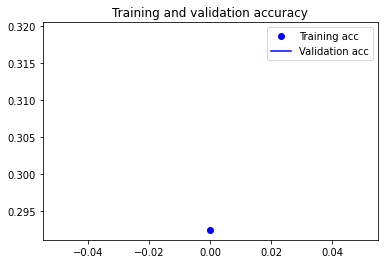

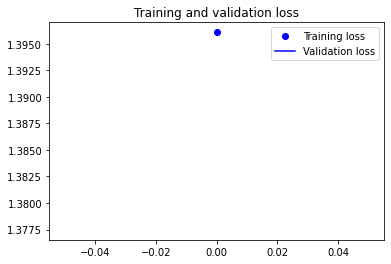

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
model.save_weights("bird4_weights.h5")